# **Paper Replication**: https://arxiv.org/abs/2010.11929 [An Image is Worth 16X16 Words]

#**Geting data**

In [1]:
import torch
from torch import nn
import requests
import zipfile
from pathlib import Path

In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
if  zipfile.is_zipfile(Path("pizza_stesk_sushi.zip")):
  print("data already exists skipping download")
else:
  print("downloading pizza_steak_sushi.zip")
  request= requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  with open("pizza_steak_sushi.zip", "wb") as f:
    f.write(request.content)
  zip_ref=zipfile.ZipFile("pizza_steak_sushi.zip")
  zip_ref.extractall()
  zip_ref.close()

downloading pizza_steak_sushi.zip


In [4]:
import os
os.listdir("train")
for dirpath, dir_name, filename in os.walk("train"):
  print(dirpath, dir_name, len(filename))

train ['pizza', 'steak', 'sushi'] 0
train/pizza [] 78
train/steak [] 75
train/sushi [] 72


In [5]:
import os

print("in Train\n")
for dir_path, dir_name, file_name in os.walk("train"):
  print(f"there are {len(dir_name)} directories | {len(file_name)} images | in {dir_path}")

print("\nin Test\n")
for dir_path, dir_name, file_name in os.walk("test"):
  print(f"there are {len(dir_name)} directories | {len(file_name)} images | in {dir_path}")

in Train

there are 3 directories | 0 images | in train
there are 0 directories | 78 images | in train/pizza
there are 0 directories | 75 images | in train/steak
there are 0 directories | 72 images | in train/sushi

in Test

there are 3 directories | 0 images | in test
there are 0 directories | 25 images | in test/pizza
there are 0 directories | 19 images | in test/steak
there are 0 directories | 31 images | in test/sushi


#**Visualizing data**

In [6]:
"train/"+str(os.listdir("train/steak"))

"train/['3727036.jpg', '937133.jpg', '225990.jpg', '2648423.jpg', '3518960.jpg', '1647351.jpg', '2222018.jpg', '3142045.jpg', '1382427.jpg', '2017387.jpg', '1966300.jpg', '922752.jpg', '100135.jpg', '2129685.jpg', '2561199.jpg', '3857508.jpg', '2087958.jpg', '165639.jpg', '3577618.jpg', '2163079.jpg', '167069.jpg', '421476.jpg', '735441.jpg', '2254705.jpg', '2287136.jpg', '1761285.jpg', '2979061.jpg', '176508.jpg', '239025.jpg', '2628106.jpg', '461689.jpg', '2013535.jpg', '1976160.jpg', '2878151.jpg', '1937872.jpg', '830007.jpg', '231296.jpg', '914570.jpg', '339891.jpg', '355715.jpg', '3245622.jpg', '3142674.jpg', '3727491.jpg', '1736968.jpg', '1624747.jpg', '234626.jpg', '2603058.jpg', '75537.jpg', '1598345.jpg', '2629750.jpg', '97656.jpg', '1787505.jpg', '560503.jpg', '3074367.jpg', '2881783.jpg', '1225762.jpg', '1264154.jpg', '2606444.jpg', '1621763.jpg', '1413972.jpg', '1839481.jpg', '256592.jpg', '1961025.jpg', '2614189.jpg', '1615395.jpg', '2825100.jpg', '1257104.jpg', '2324994.j

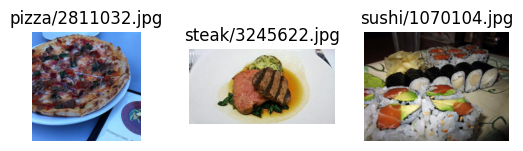

In [7]:
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

dir=[]
j=1
for i in range(3):
  dir.append(random.choice(os.listdir("train")))

for i in dir:

  rand_img=random.choice(os.listdir("train/"+i))
  rand_path="train/"+i+"/"+str(rand_img )
  x= i+"/"+rand_img
  img= Image.open(rand_path)
  img_plt=np.array(img) 
  plt.subplot(3,3, j)
  plt.imshow(img) #img_plt can also be used
  plt.axis("off")
  plt.title(f"{x}")
  j+=1

#**Preprocessing the data**

In [8]:
import torchvision
from torchvision import transforms

In [9]:
transformer=transforms.Compose([transforms.Resize((224, 224)), #img size from paper
                                transforms.ToTensor()])

In [10]:
def transformed_image_plotter(transformer=transformer):

  for i in dir:

    rand_img=random.choice(os.listdir("train/"+i))
    rand_path="train/"+i+"/"+str(rand_img )
  img_path= "train/"+i+"/"+rand_img


  img=Image.open(img_path)
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.axis("off")
  plt.title(f"original\nshape{img.size}")


  img_t=transformer(img)
  transformer(img).permute(1,2,0) # C*H*W -> H*W*C
  img_t=img_t.permute(1,2,0) 
  plt.subplot(1,2,2)
  plt.imshow(img_t)
  plt.axis("off")
  plt.title(f"transformed\nshape{img_t.shape}")

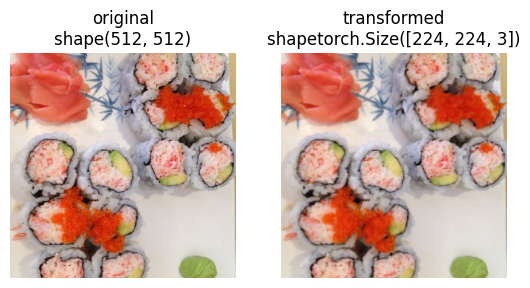

In [11]:
transformed_image_plotter()

#**Loading Image from Directory**

##**Dataset**

In [12]:
train_dataset=torchvision.datasets.ImageFolder("train",
                                               transform=transformer,
                                               target_transform=None)

test_dataset=torchvision.datasets.ImageFolder("test",
                                               transform=transformer,
                                               target_transform=None)

In [13]:
train_dataset, test_dataset

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [14]:
img, label=train_dataset[1]
img.shape, label

(torch.Size([3, 224, 224]), 0)

In [15]:
train_dataset.samples[1]

('train/pizza/1033251.jpg', 0)

##**DataLoader**

In [16]:
train_dataloader=torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count(), pin_memory=True)
test_dataloader=torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count(), pin_memory=True)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f182c5bae90>,
 <torch.utils.data.dataloader.DataLoader at 0x7f182c5bb670>)

In [17]:
imgs, labels=next(iter(train_dataloader))
imgs.shape, labels

(torch.Size([32, 3, 224, 224]),
 tensor([2, 1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 2, 0, 1,
         1, 2, 0, 1, 1, 1, 2, 0]))

#**Building the model**

In [18]:
#Values from the paper

height=224
width=224
channels=3
patch_size=16
number_of_patches=int((height*width)/(patch_size*patch_size))
latent_vector_size=int((height*width*channels)/number_of_patches)
embedding_dim=latent_vector_size
number_of_patches, latent_vector_size

(196, 768)

In [19]:
input_embedding_shape=(height, width, channels)
output_embedding_shape=(number_of_patches, latent_vector_size)

input_embedding_shape, output_embedding_shape

((224, 224, 3), (196, 768))

##**Embedding**

###**Forming Patches**

In [20]:
import matplotlib.pyplot as plt

def make_patches(img, img_size=height*width, patch=patch_size):

  img_lst=[]
  img=img.permute(1,2,0)
  patch_size=patch**2
  assert (img_size%patch_size)==0
  num_patch=int(img_size/patch_size)
  for i in range(int(num_patch**0.5)):
    for j in range(int(num_patch**0.5)):
      patch_val=img[i*patch:(i+1)*patch, j*patch:(j+1)*patch]
      img_lst.append(patch_val)
  return img_lst

def plot_patches(img_lst, height= height, patch_size=patch_size):
  fig, axs=plt.subplots(nrows=int(height/patch_size),
                        ncols=int(height/patch_size),
                        sharex=True,
                        sharey=True)
  k=0
  for i in range(int(height/patch_size)):
    for j in range(int(height/patch_size)):
      axs[i,j].imshow(img_lst[k])
      axs[i, j].set_xticks([])
      axs[i, j].set_yticks([])
      k+=1
  plt.show()

In [21]:
img, label=next(iter(train_dataloader))

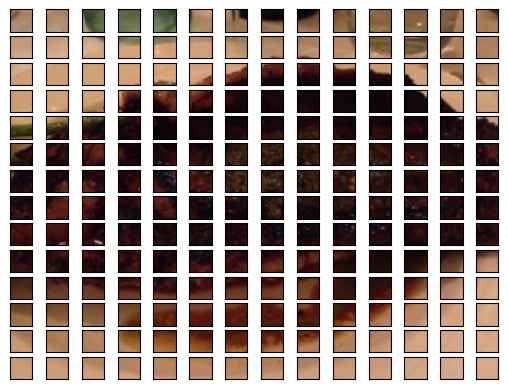

In [22]:
img_lst=make_patches(img[0])
plot_patches(img_lst)

###**Creating embeddings**

In [23]:
kernel, stride= patch_size, patch_size #slide across 1 complete patch
in_channels, out_channels=channels,latent_vector_size

In [24]:
embedding_layer=nn.Sequential( nn.Conv2d(in_channels=in_channels, 
                                         out_channels=out_channels,
                                         stride=stride,
                                         kernel_size=kernel),
                               nn.Flatten(start_dim=2, end_dim=-1))
embedding_layer

Sequential(
  (0): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (1): Flatten(start_dim=2, end_dim=-1)
)

In [25]:
img_lst[0].shape

torch.Size([16, 16, 3])

In [26]:
embedding_layer(img[0].unsqueeze(0)).shape #here the index must be permuted, num patches shd be at idx=1 and embedding at idx=2 

torch.Size([1, 768, 196])

####**Embedding+Pathcing Module**

In [27]:
class patch_embedding(nn.Module):
  def __init__(self, in_channels:int=3,
               patch_size:int=16, embedding_dim=768, img_size: int=224, batch_size=1, device=device):
    
    super().__init__()
    self.patcher=nn.Conv2d(in_channels=in_channels,
                           out_channels=embedding_dim,
                           stride=patch_size,
                           kernel_size=patch_size).to(device)
    
    self.npatch=(img_size**2)//(patch_size**2)

    self.flatten=nn.Flatten(start_dim=2, end_dim=-1).to(device)
    
    #updated to include all embeddings
    self.class_embedding=nn.Parameter(torch.randn(1,1,embedding_dim),
                                      requires_grad=True).expand(batch_size,-1,-1).to(device) #to take into account the batch size
    
    self.pos_embedding=nn.Parameter(torch.randn(1,1+self.npatch, embedding_dim),
                                    requires_grad=True).expand(batch_size,-1,-1).to(device)

  def forward(self, x):
      x_patched= self.patcher(x)
      x_flattened=self.flatten(x_patched)
      x=x_flattened.permute(0,2,1)

      x_class_embedding=torch.cat((self.class_embedding, x), dim=1)
      x_pos_embedding=x_class_embedding+self.pos_embedding

      return x_pos_embedding

In [28]:
embedding_layer=patch_embedding()
emb_img=embedding_layer(img[0].to(device).unsqueeze(0))
emb_img.shape

torch.Size([1, 197, 768])

###**Class Embedding**

In [29]:
# batch_size=emb_img.shape[0]
# embedding_dim=emb_img.shape[-1]

# token_emb=nn.Parameter(torch.randn((batch_size, 1, embedding_dim)), #custom trainable weights
#                        requires_grad=True)

# emb_img_with_class_token=torch.cat((token_emb, emb_img), dim=1)
# emb_img_with_class_token.shape #extra element at dim=1

###**Pos Embedding**

In [30]:
# pos_emb=nn.Parameter(torch.randn((batch_size, number_of_patches+1, embedding_dim)),
#                      requires_grad=True)
# final_emb_img=emb_img_with_class_token+pos_emb
# final_emb_img.shape #same shape as emb_img_with_tokens but with more trainable params

##**MSA Block**

###**MSA Module**

In [31]:
class MSAblock(nn.Module):
  def __init__(self, embedding_dim:int =embedding_dim,
               num_heads: int=12): #num_heads from paper

    super().__init__()
    self.layer_norm=nn.LayerNorm(embedding_dim).to(device)
    self.MSA=nn.MultiheadAttention(embed_dim=embedding_dim,
                                   num_heads=num_heads,
                                   batch_first=True).to(device) #(batch, seq, feature)-> this is how our input data looks ie:(batch, number_if_patches, embedding_dimension)
  def forward(self,x):
    x_ln=self.layer_norm(x)
    x_msa_out, _=self.MSA(query=x_ln,
                          key=x_ln,
                          value=x_ln,
                          need_weights=False) #it returns weights in addition 

    return x_msa_out + x #x->residual connection

In [32]:
msa_block=MSAblock()
msa_block_output=msa_block(emb_img)
msa_block_output.shape #shape is retained

torch.Size([1, 197, 768])

##**MLP Block**

###**MLP Module**

In [33]:
class MLPblock(nn.Module):
  def __init__(self, in_channels: int=embedding_dim, mlp_size: int=3072, dropout: float=0.1, device=device):
    super().__init__()
    self.layer_norm=nn.LayerNorm(embedding_dim).to(device)
    self.mlp= nn.Sequential(nn.Linear(in_features=in_channels,
                                      out_features=mlp_size),
                            nn.GELU(),
                            nn.Dropout(p=dropout),
                            nn.Linear(in_features=mlp_size,
                                      out_features=in_channels),
                            nn.Dropout(p=dropout)).to(device) 

  def forward(self, x):
    x_ln=self.layer_norm(x)
    mlp_out=self.mlp(x_ln)
    
    return mlp_out + x #x->residual connection

In [34]:
mlp_block=MLPblock()
mlp_block_output=mlp_block(msa_block_output)
mlp_block_output.shape

torch.Size([1, 197, 768])

##**Encoder Block**

In [35]:
class encoder(nn.Module):
  def __init__(self, embedding_dim:int =embedding_dim,num_heads: int=12,
               in_channels: int=embedding_dim, mlp_size: int=3072, dropout: float=0.1, device=device):
    
    super().__init__()
    self.msa_block=MSAblock(embedding_dim=embedding_dim,
                            num_heads=num_heads).to(device)
    self.mlp_block=MLPblock(in_channels=embedding_dim,
                            mlp_size=mlp_size,
                            dropout=dropout).to(device)

  def forward(self, x):
    msa_out=self.msa_block(x)
    mlp_out=self.mlp_block(msa_out)

    return mlp_out

In [36]:
encoder_block=encoder()
encoder_block(emb_img).shape

torch.Size([1, 197, 768])

In [37]:
!pip install torchinfo
from torchinfo import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
summary(encoder_block,
        input_size=(1,197,768),
        col_names=["input_size","output_size","num_params","trainable"],
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape               Output Shape              Param #                   Trainable
encoder (encoder)                        [1, 197, 768]             [1, 197, 768]             --                        True
├─MSAblock (msa_block)                   [1, 197, 768]             [1, 197, 768]             --                        True
│    └─LayerNorm (layer_norm)            [1, 197, 768]             [1, 197, 768]             1,536                     True
│    └─MultiheadAttention (MSA)          --                        [1, 197, 768]             2,362,368                 True
├─MLPblock (mlp_block)                   [1, 197, 768]             [1, 197, 768]             --                        True
│    └─LayerNorm (layer_norm)            [1, 197, 768]             [1, 197, 768]             1,536                     True
│    └─Sequential (mlp)                  [1, 197, 768]             [1, 197, 768]             --                        True
│  

**Simpler way to create this encoder would be through ```torch.nn.TransformerEncoderLayer``` class, the encoder-decoder model is popular enough to be leveraged as a pre built class in pytorch**

In [39]:
torch_encoder_block=torch.nn.TransformerEncoderLayer(d_model=768, nhead=12,
                                                     dim_feedforward=3072, dropout=0.1,
                                                     activation="gelu", batch_first=True,
                                                     norm_first=True)
torch_encoder_block

TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
  )
  (linear1): Linear(in_features=768, out_features=3072, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=3072, out_features=768, bias=True)
  (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

In [40]:
summary(model=torch_encoder_block,
        input_size=(1,197,768),
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderLayer (TransformerEncoderLayer)  [1, 197, 768]        [1, 197, 768]        7,087,872            True
Total params: 7,087,872
Trainable params: 7,087,872
Non-trainable params: 0
Total mult-adds (M): 0
Input size (MB): 0.61
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.61

##**ViT Class**

In [41]:
class ViT(nn.Module):
  def __init__(self, img_size: int=224,
               in_channels: int=3, patch_size:int=16,
               embedding_dim:int=768, ntransformer_layer: int=12,
               mlp_size: int=3072, n_heads:int=12,
               mlp_dropout:float=0.1, embedding_dropout: float=0.1,
               n_classes:int=1000, device=device):
    
    self.in_channels=in_channels
    self.patch_size=patch_size
    self.embedding_dim=embedding_dim
    super().__init__()
    # self.patch_embed_layer=patch_embedding(in_channels=in_channels, patch_size=patch_size, embedding_dim=embedding_dim, batch_size=batch_size)

    self.encoder=nn.Sequential(*[encoder(embedding_dim=embedding_dim, num_heads=n_heads, in_channels=embedding_dim,
                                         mlp_size=mlp_size, dropout=mlp_dropout) for _ in range(ntransformer_layer)]).to(device)
    
    self.torch_encoder=nn.Sequential(*[torch.nn.TransformerEncoderLayer(d_model=embedding_dim, nhead=n_heads,
                                                        dim_feedforward=mlp_size, dropout=mlp_dropout,
                                                        activation="gelu", batch_first=True,
                                                        norm_first=True) for _ in range(ntransformer_layer)]).to(device)
    
    self.classifier=nn.Sequential(nn.LayerNorm(normalized_shape=embedding_dim),
                                  nn.Linear(in_features= embedding_dim, out_features=n_classes),
                                  nn.Softmax()).to(device)
    
    self.embedding_dropout=nn.Dropout(p=embedding_dropout).to(device)

  def forward(self, x):
    batch_size=x.shape[0]
    self.patch_embed_layer=patch_embedding(in_channels=self.in_channels, patch_size=self.patch_size, embedding_dim=self.embedding_dim, batch_size=batch_size).to(device)
    x_embed=self.patch_embed_layer(x)
    x_embed_with_dropout=self.embedding_dropout(x_embed)
    x_encoder_out=self.encoder(x_embed_with_dropout)
    x_classifier_out=self.classifier(x_encoder_out[:,0]) #classifier is set to work only on class token

    return x_classifier_out

In [42]:
vit_model=ViT(n_classes=3)

In [43]:
summary(vit_model.to(device),
        input_size=(32,3,224,224),
        col_names=["input_size","output_size","num_params","trainable"],
        row_settings=["var_names"])

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Layer (type (var_name))                       Input Shape               Output Shape              Param #                   Trainable
ViT (ViT)                                     [32, 3, 224, 224]         [32, 3]                   85,054,464                True
├─Dropout (embedding_dropout)                 [32, 197, 768]            [32, 197, 768]            --                        --
├─Sequential (encoder)                        [32, 197, 768]            [32, 197, 768]            --                        True
│    └─encoder (0)                            [32, 197, 768]            [32, 197, 768]            --                        True
│    │    └─MSAblock (msa_block)              [32, 197, 768]            [32, 197, 768]            2,363,904                 True
│    │    └─MLPblock (mlp_block)              [32, 197, 768]            [32, 197, 768]            4,723,968                 True
│    └─encoder (1)                            [32, 197, 768]            [32, 197, 768]        

In [44]:
!wget https://github.com/Jothish2283/DeepLearning-Torch/raw/main/run_model.py

--2023-06-09 07:56:49--  https://github.com/Jothish2283/DeepLearning-Torch/raw/main/run_model.py
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Jothish2283/DeepLearning-Torch/main/run_model.py [following]
--2023-06-09 07:56:49--  https://raw.githubusercontent.com/Jothish2283/DeepLearning-Torch/main/run_model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2227 (2.2K) [text/plain]
Saving to: ‘run_model.py’

run_model.py        100%[===================>]   2.17K  --.-KB/s    in 0s      

2023-06-09 07:56:49 (41.4 MB/s) - ‘run_model.py’ saved [2227/2227]



In [45]:
from run_model import run_model
vit_result=run_model(vit_model, 10, train_dataloader, test_dataloader, device, log_path="ViT")

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)



--Epoch: 0--
Train_loss:1.245 | Train_acc:0.281 | Test_loss:1.172 | Test_acc:0.380

--Epoch: 1--
Train_loss:1.126 | Train_acc:0.426 | Test_loss:1.192 | Test_acc:0.360

--Epoch: 2--
Train_loss:1.247 | Train_acc:0.305 | Test_loss:1.211 | Test_acc:0.340

--Epoch: 3--
Train_loss:1.247 | Train_acc:0.305 | Test_loss:1.291 | Test_acc:0.260

--Epoch: 4--
Train_loss:1.126 | Train_acc:0.426 | Test_loss:1.192 | Test_acc:0.360

--Epoch: 5--
Train_loss:1.247 | Train_acc:0.305 | Test_loss:1.231 | Test_acc:0.320

--Epoch: 6--
Train_loss:1.247 | Train_acc:0.305 | Test_loss:1.211 | Test_acc:0.340

--Epoch: 7--
Train_loss:1.247 | Train_acc:0.305 | Test_loss:1.192 | Test_acc:0.360

--Epoch: 8--
Train_loss:1.126 | Train_acc:0.426 | Test_loss:1.172 | Test_acc:0.380

--Epoch: 9--
Train_loss:1.247 | Train_acc:0.305 | Test_loss:1.192 | Test_acc:0.360

Time Taken: 1.8704268153333337 mins


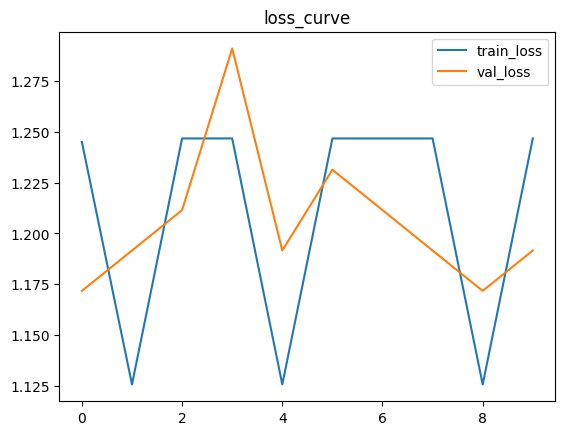

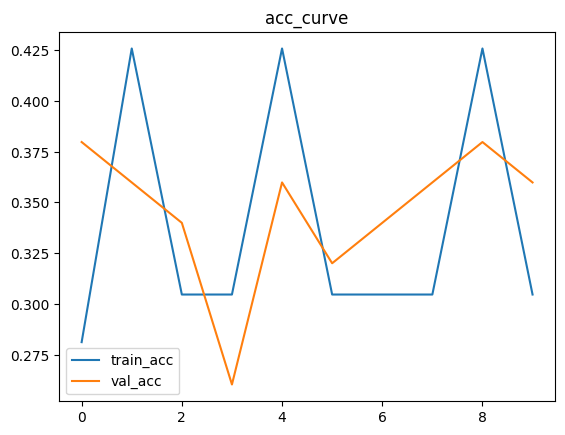

In [53]:
import pandas as pd

vit_df=pd.DataFrame(vit_result)
vit_df[["train_loss", "val_loss"]].plot(title="loss_curve")
vit_df[["train_acc", "val_acc"]].plot(title="acc_curve");
plt.show()

**The model performed poorly because it was trained on a much smaller dataset when compared to the ones mentioned in the paper, we can overcome this by leveraging transfer learning**

#**Transfer learning**


In [61]:
import torchvision

vit_weights= torchvision.models.ViT_B_16_Weights.DEFAULT
vit_weights

ViT_B_16_Weights.IMAGENET1K_V1

In [75]:
transformer_transfer=vit_weights.transforms()

In [76]:
train_dataset=torchvision.datasets.ImageFolder("train",
                                               transform=transformer_transfer,
                                               target_transform=None)

test_dataset=torchvision.datasets.ImageFolder("test",
                                               transform=transformer_transfer,
                                               target_transform=None)

In [77]:
train_dataloader=torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count(), pin_memory=True)
test_dataloader=torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count(), pin_memory=True)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f166c102da0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f166c1008b0>)

In [79]:
img, label=next(iter(train_dataloader))
img.shape

torch.Size([32, 3, 224, 224])

In [85]:
vit_transformer=torchvision.models.vit_b_16(weights=vit_weights).to(device)
for params in vit_transformer.parameters():
  params.requires_grad=False

vit_transformer.heads=nn.Linear(in_features=768, out_features=3) #pizza, sushi, steak

In [86]:
summary(vit_transformer,input_size=(1,3,224,224),
        col_names=["input_size","output_size","num_params","trainable"],
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape               Output Shape              Param #                   Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]          [1, 3]                    768                       Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]          [1, 768, 14, 14]          (590,592)                 False
├─Encoder (encoder)                                          [1, 197, 768]             [1, 197, 768]             151,296                   False
│    └─Dropout (dropout)                                     [1, 197, 768]             [1, 197, 768]             --                        --
│    └─Sequential (layers)                                   [1, 197, 768]             [1, 197, 768]             --                        False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]             [1, 197, 768]             (7,087,872)   

In [89]:
vit_t_result=run_model(vit_transformer, 10, train_dataloader, test_dataloader, device, log_path="ViT")

  0%|          | 0/10 [00:00<?, ?it/s]


--Epoch: 0--
Train_loss:0.859 | Train_acc:0.613 | Test_loss:0.579 | Test_acc:0.825

--Epoch: 1--
Train_loss:0.370 | Train_acc:0.930 | Test_loss:0.302 | Test_acc:0.927

--Epoch: 2--
Train_loss:0.252 | Train_acc:0.957 | Test_loss:0.245 | Test_acc:0.918

--Epoch: 3--
Train_loss:0.172 | Train_acc:0.961 | Test_loss:0.195 | Test_acc:0.938

--Epoch: 4--
Train_loss:0.143 | Train_acc:0.965 | Test_loss:0.183 | Test_acc:0.948

--Epoch: 5--
Train_loss:0.121 | Train_acc:0.977 | Test_loss:0.197 | Test_acc:0.928

--Epoch: 6--
Train_loss:0.128 | Train_acc:0.977 | Test_loss:0.164 | Test_acc:0.948

--Epoch: 7--
Train_loss:0.092 | Train_acc:0.980 | Test_loss:0.197 | Test_acc:0.928

--Epoch: 8--
Train_loss:0.083 | Train_acc:0.988 | Test_loss:0.264 | Test_acc:0.919

--Epoch: 9--
Train_loss:0.077 | Train_acc:0.988 | Test_loss:0.171 | Test_acc:0.948

Time Taken: 0.8869173349833394 mins


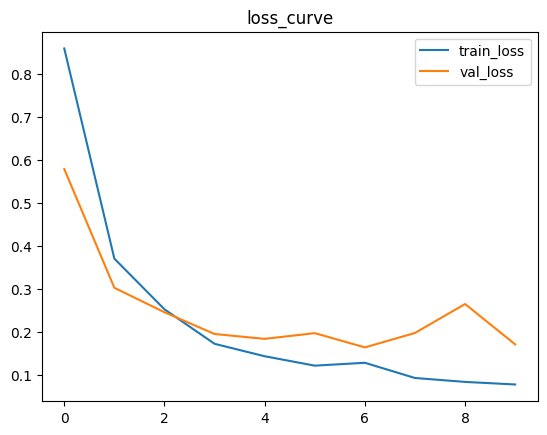

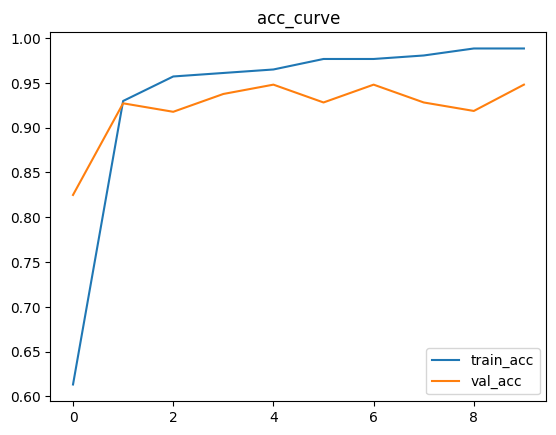

In [90]:
vit_t_df=pd.DataFrame(vit_t_result)
vit_t_df[["train_loss", "val_loss"]].plot(title="loss_curve")
vit_t_df[["train_acc", "val_acc"]].plot(title="acc_curve");
plt.show()